# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX + [x for x in ASIA_FX if x != "USDCNH"]
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2021-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

# Data integrity

<AxesSubplot:>

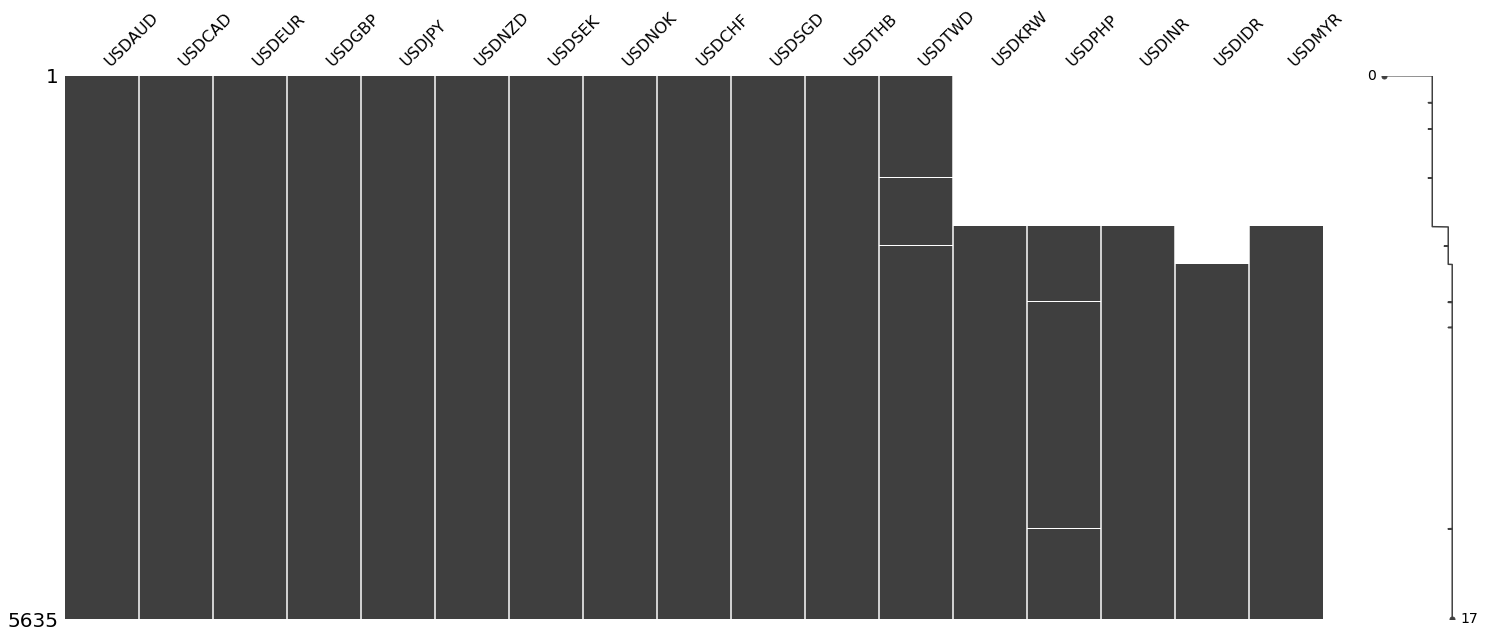

In [4]:
msmx(carry_returns)

<AxesSubplot:>

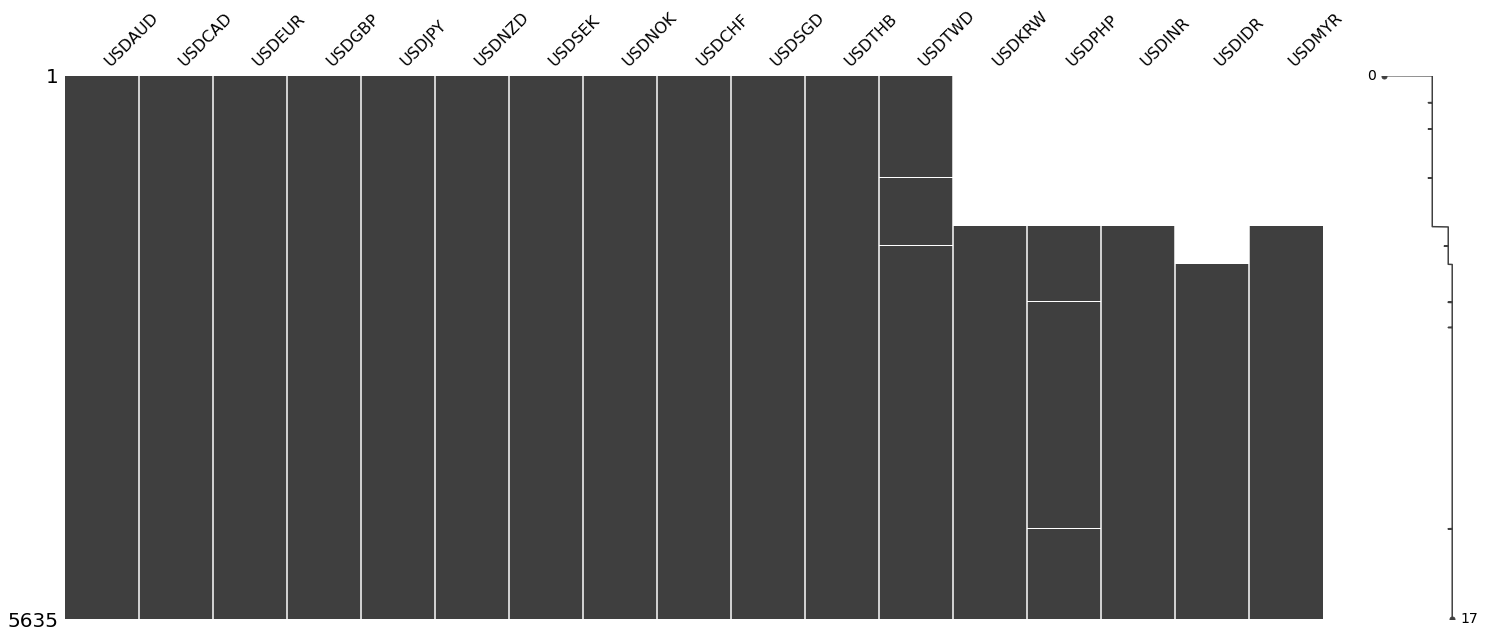

In [5]:
msmx(spot_returns)

# Signal

In [6]:
num = carry_returns.pipe(fill_date, True) ### historical returns from carry
denom = spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*3) ### volatility of spot returns
signal = (num/denom).pipe(omit_leading_na, "any").pipe(high_minus_low)
sig = signal * (1/spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*6)) ### magnitude is 1/vol

# Backtest Daily Rebal

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.08012872626393534
Vol       : 0.1070604640628542
SR        : 0.7484436665330771
Max DD    : -26.72

C Returns : 0.07721238971531122
C SR      : 0.6208219036435039
C Max DD  : -24.02

Hit rate  : 0.532
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.14


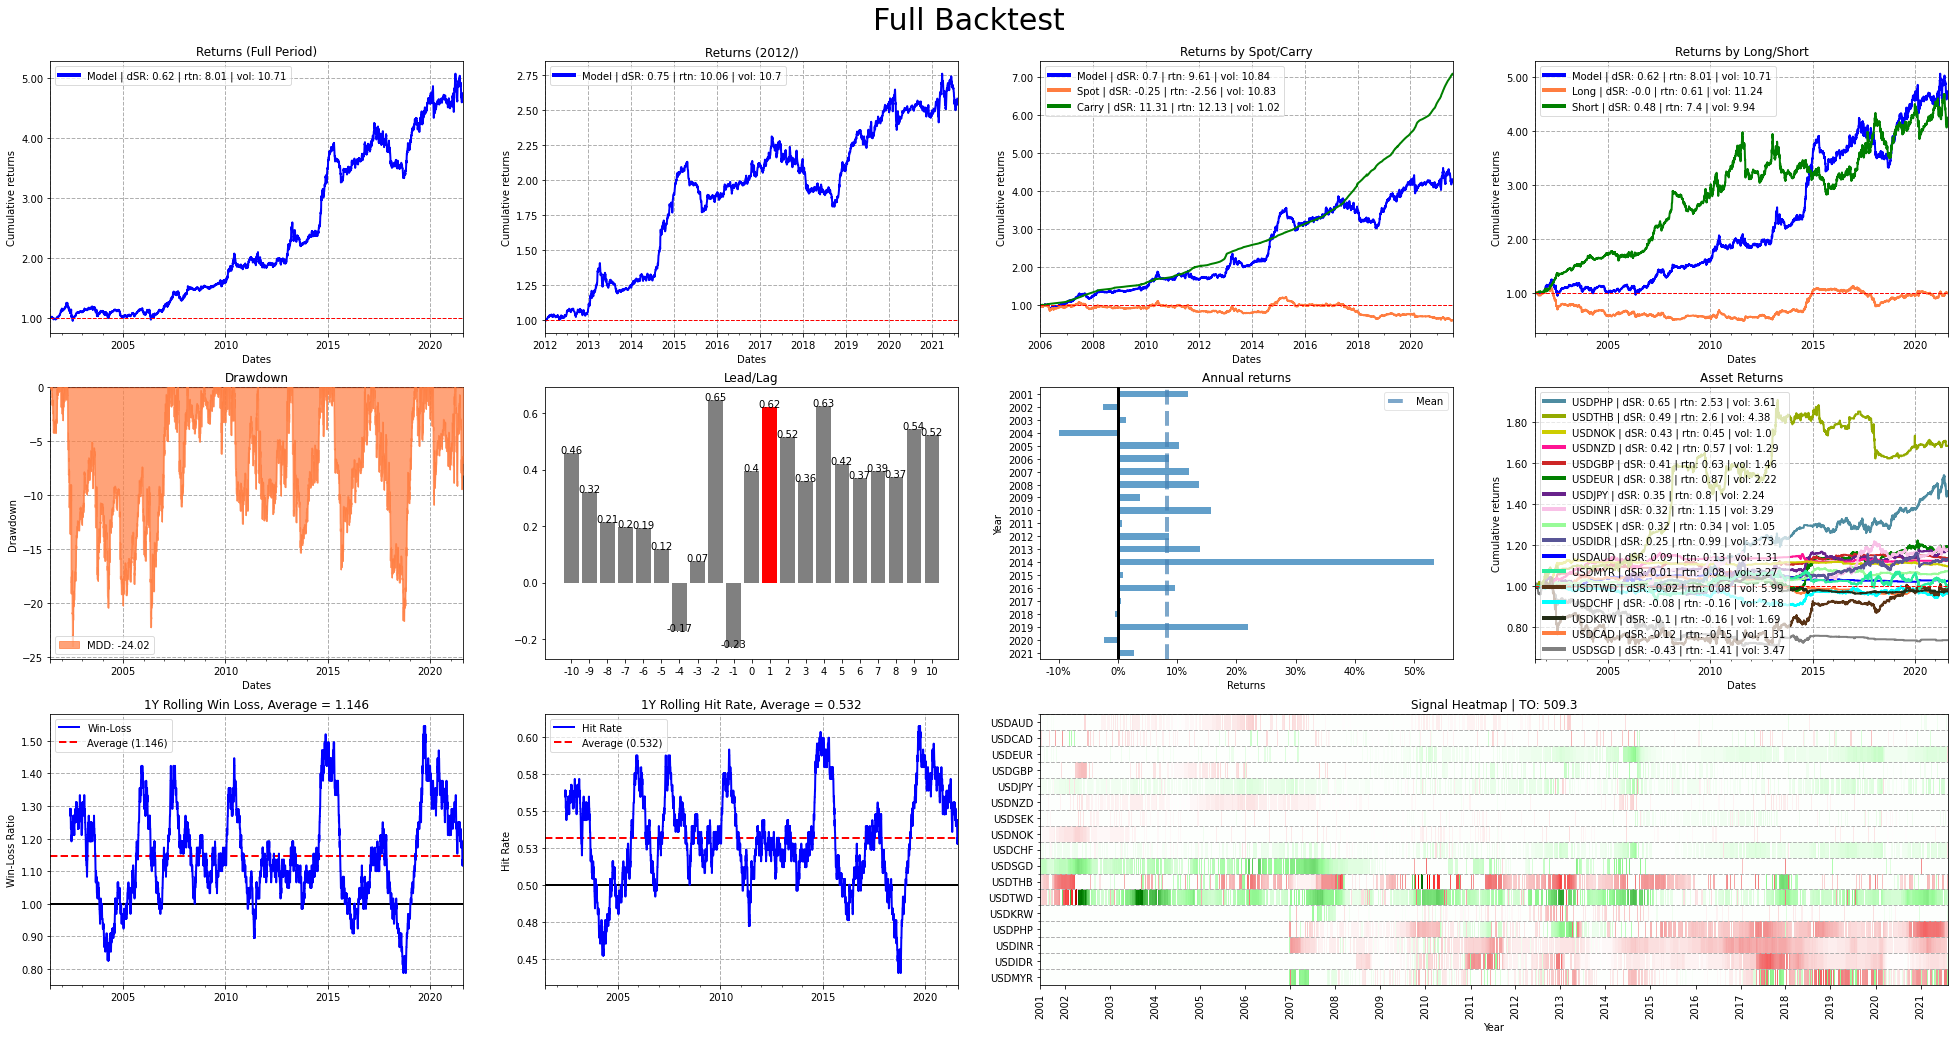

In [7]:
daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":False})
daily_bt.run()
get_summary(daily_bt)
plot_bt(daily_bt)

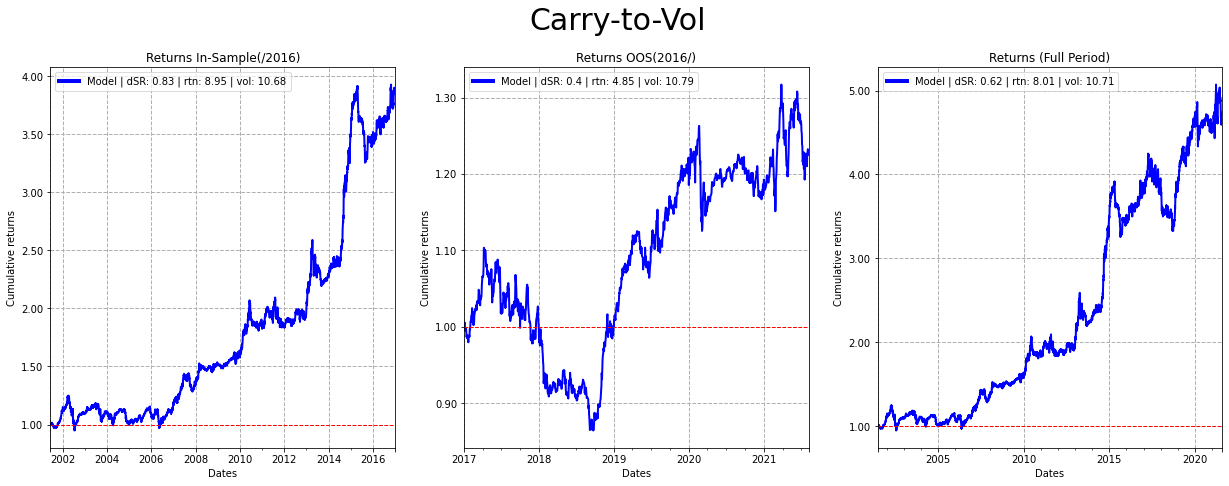

In [8]:
gs = GridSpec(nrows = 1, ncols = 3)
fig = plt.figure(figsize=(21, 7))
fig.suptitle(t="Carry-to-Vol", fontsize=30, y=1)

fig.add_subplot(gs[0]).set_label(gen_plot_rtn(daily_bt.model_rtn[:"2016"], main = "Returns In-Sample(/2016)", compound=True))
fig.add_subplot(gs[1]).set_label(gen_plot_rtn(daily_bt.model_rtn["2017":], main = "Returns OOS(2016/)", compound=True))
fig.add_subplot(gs[2]).set_label(gen_plot_rtn(daily_bt.model_rtn, main = "Returns (Full Period)", compound=True))

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.0847776233925249
Vol       : 0.10733510623502632
SR        : 0.7898405877280409
Max DD    : -30.49

C Returns : 0.08220149280397322
C SR      : 0.6223746213543174
C Max DD  : -26.87

Hit rate  : 0.533
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.14


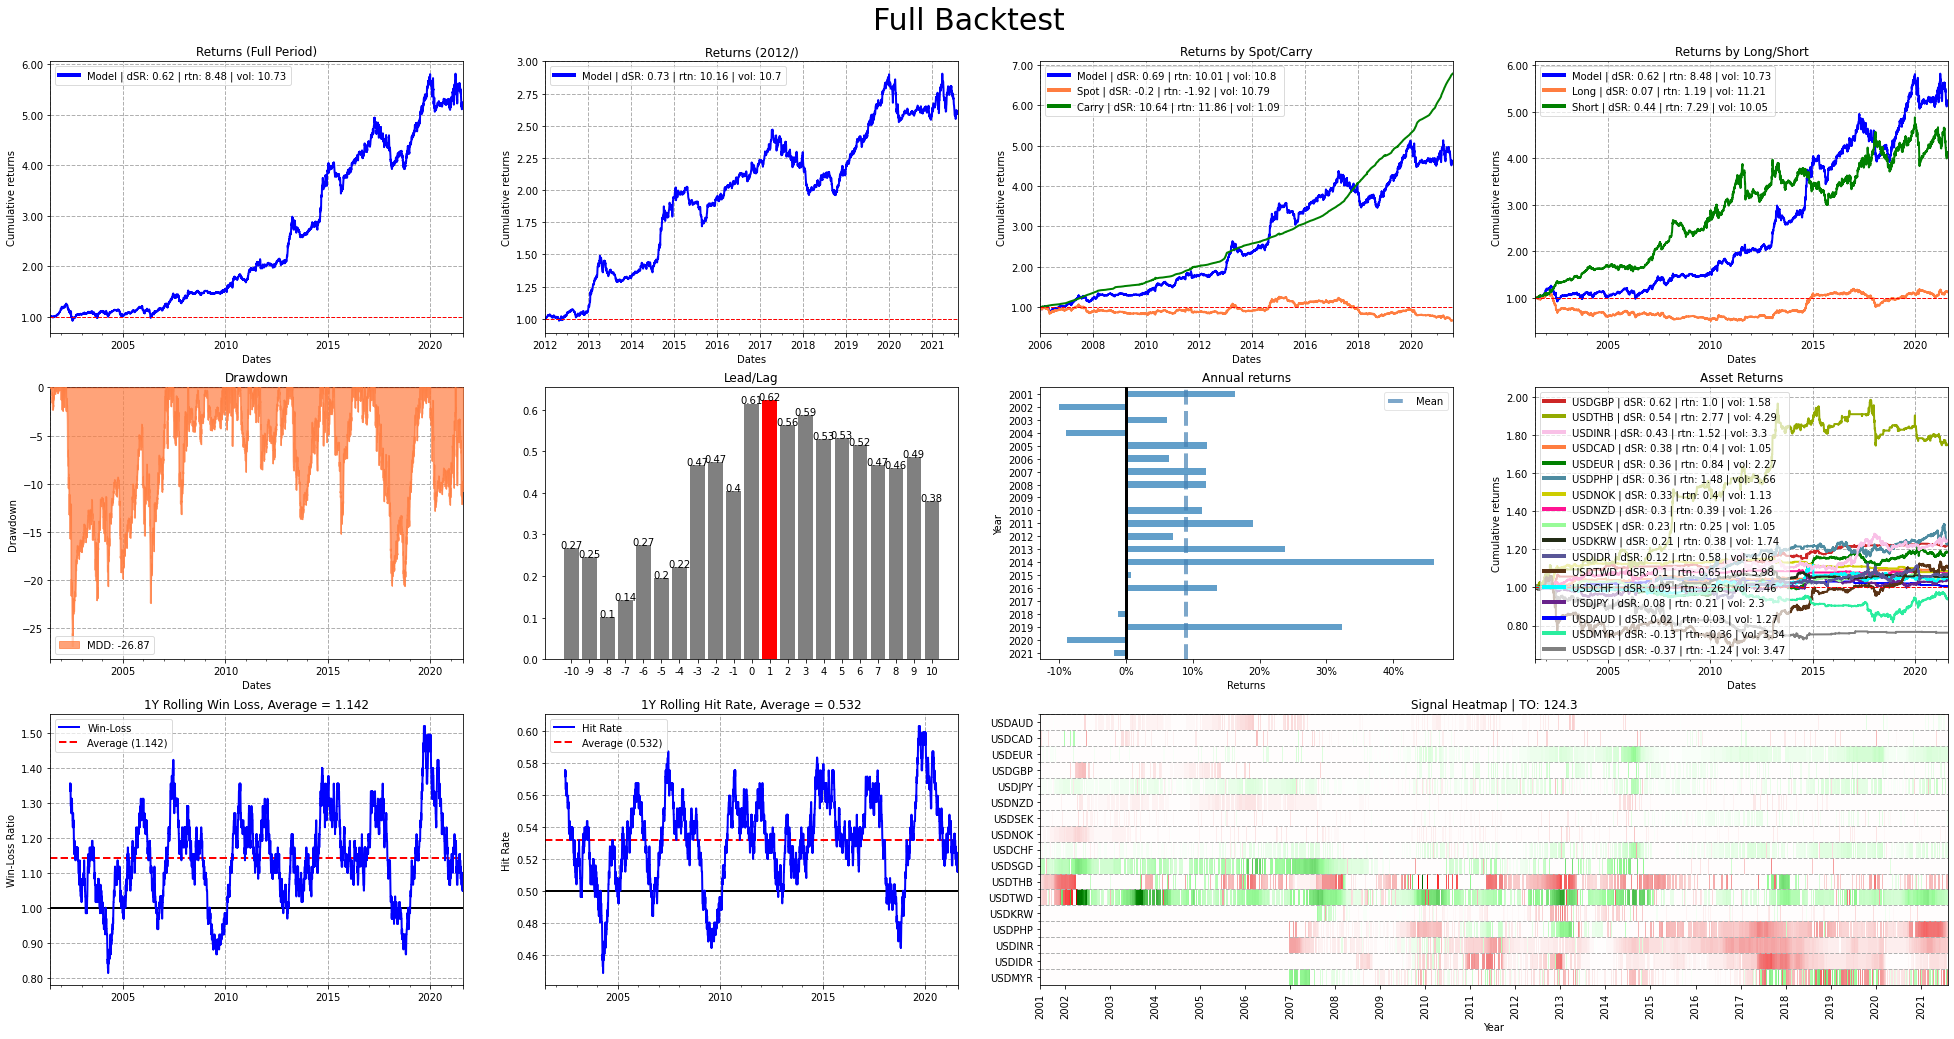

In [9]:
weekly_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"rebalance_period":"friday"})
weekly_bt.run()
get_summary(weekly_bt)
plot_bt(weekly_bt)

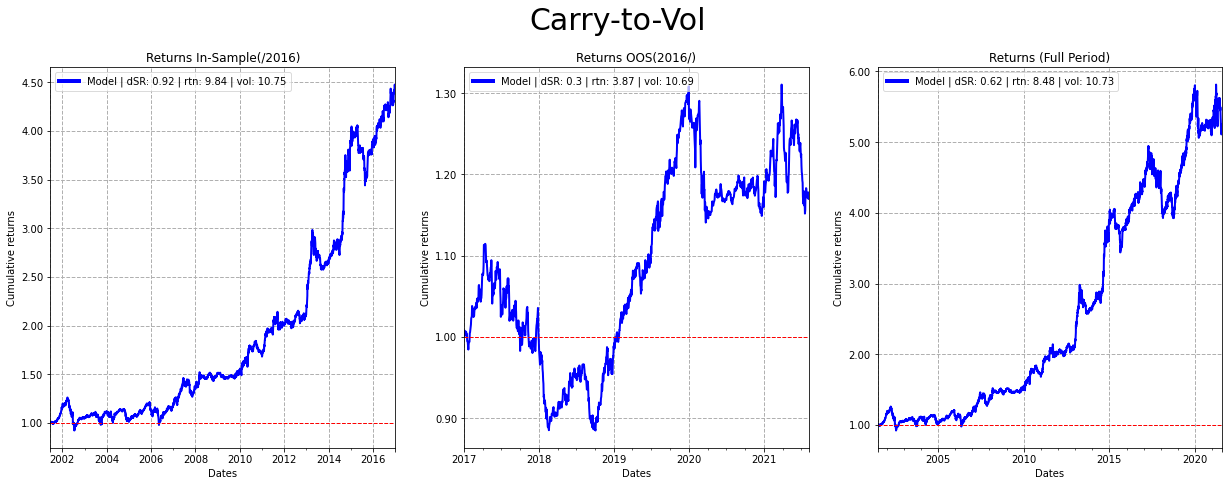

In [11]:
gs = GridSpec(nrows = 1, ncols = 3)
fig = plt.figure(figsize=(21, 7))
fig.suptitle(t="Carry-to-Vol", fontsize=30, y=1)

fig.add_subplot(gs[0]).set_label(gen_plot_rtn(weekly_bt.model_rtn[:"2016"], main = "Returns In-Sample(/2016)", compound=True))
fig.add_subplot(gs[1]).set_label(gen_plot_rtn(weekly_bt.model_rtn["2017":], main = "Returns OOS(2016/)", compound=True))
fig.add_subplot(gs[2]).set_label(gen_plot_rtn(weekly_bt.model_rtn, main = "Returns (Full Period)", compound=True))